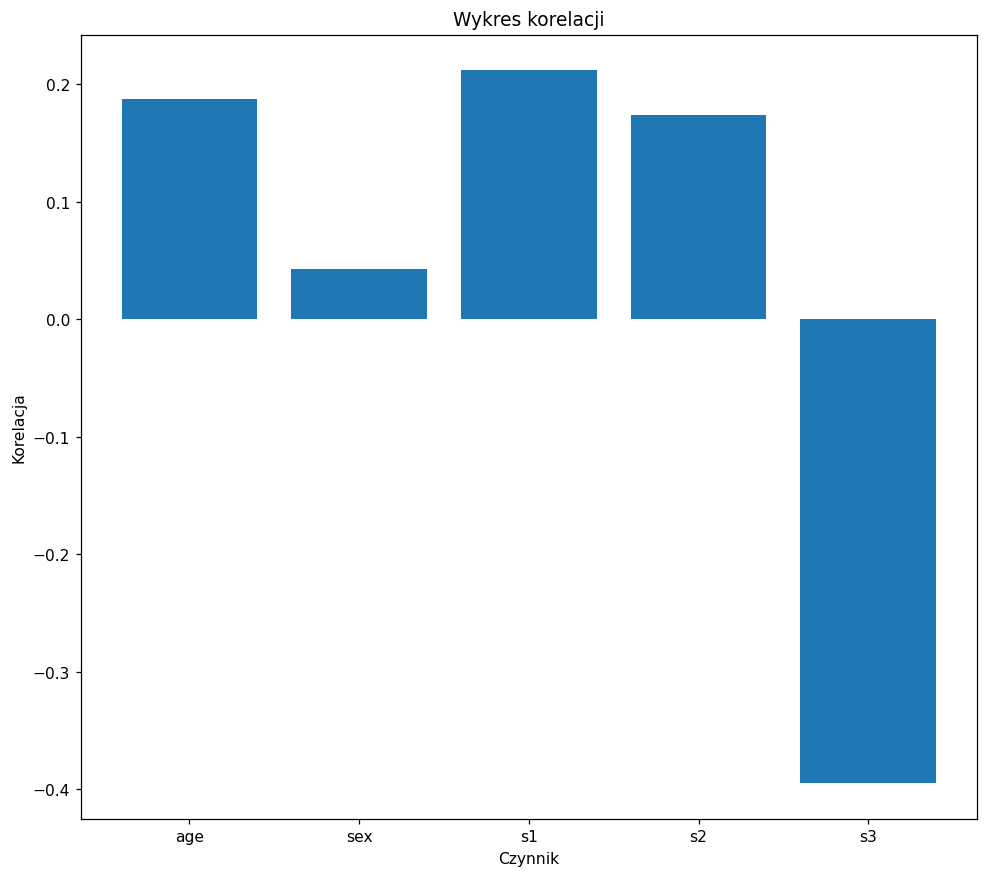

In [8]:
# Zadanie 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# print(diabetes.DESCR)

X, y = load_diabetes(return_X_y=True, as_frame=True)
X = X.drop(columns=['bmi', 'bp', 's4', 's5', 's6'])
X['target'] = y
cor = X.corr()

plt_x = np.array(X.columns)[:-1] # remove the target column
plt_y = cor.to_numpy()[-1][:-1] # remove the target column

fig = plt.figure(figsize=(8,7), dpi = 112) # create a figure object
ax = fig.add_axes([0,0,1,1]) # create an axis object
ax.set_title('Wykres korelacji')
ax.set_xlabel('Czynnik')
ax.set_ylabel('Korelacja')
ax.bar(plt_x, plt_y) # create a bar plot
plt.show() # display the plot

In [40]:
# Zadanie 2

# Plik credit.asc zawiera dane o kredytach, ostatnia kolumna zawiera info o przyznanym kredycie (1) albo odmowie (0). Przeskaluj dane 3 poznanymi sposobami. Przeprowadź klasyfikację oryginalnych i przeskalowanych danych 2 modelami drzew decyzynych o wybranych przez siebie głębokośiach. Oceń modele.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Read the data from credit.asc file
data = pd.read_csv('credit.asc', sep=' ', header=None)

# delete headers
headers = data[:1]
data = data.drop(0)
# print(headers)
# print(data)

# Split the data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

dec_tree_depths = [3, 5, 7]
scalers = [(MinMaxScaler(),"MinMax Scaler"), (StandardScaler(),"Standard Scaler"), (RobustScaler(), "Robust Scaler")]

for scaler, scaler_name in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f"Using {scaler_name}")
    for depth in dec_tree_depths:
        dec_tree = DecisionTreeClassifier(max_depth=depth)
        dec_tree.fit(X_train_scaled, y_train)
        y_pred = dec_tree.predict(X_test_scaled)
        print(f"Accuracy for depth {depth}: {accuracy_score(y_test, y_pred)}")


Using MinMax Scaler
Accuracy for depth 3: 0.695
Accuracy for depth 5: 0.7
Accuracy for depth 7: 0.69
Using Standard Scaler
Accuracy for depth 3: 0.695
Accuracy for depth 5: 0.7
Accuracy for depth 7: 0.685
Using Robust Scaler
Accuracy for depth 3: 0.695
Accuracy for depth 5: 0.7
Accuracy for depth 7: 0.69


In [54]:
# Zadanie 3

# Plik accent.csv zawiera 12 cech charakterystycznych z głosów osób mówiących z akcentami z 6 różnych języków. wczytaj te dane, ewentualne wartości odstające zastąp średnią i przeskaluj wybraną metodą. Przygotuj 3 różne modele sztucznych sieci neuronowych klasyfikujących akcenty i przeprowadź ich 5-krotną walidację krzyżową. Wskaż najlepszy model.

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Read the data
data = pd.read_csv('accent.csv', header=None, skiprows=1)

# Extract features and target
X = data.iloc[:, 1:].values  # Features are all columns except the first
y = data.iloc[:, 0]  # Target is the first column (language)

# Encode the target labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Replace outliers with the mean
imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define neural network models
models = [
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(300, 150), max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(400, 200), max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(500, 250), max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(600, 300), max_iter=1000, random_state=42)
]

# Perform 5-fold cross-validation
for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Model {i+1}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


Model 1: Accuracy = 0.7202 ± 0.0893
Model 2: Accuracy = 0.7569 ± 0.0818
Model 3: Accuracy = 0.7690 ± 0.0797
Model 4: Accuracy = 0.7356 ± 0.0595
Model 5: Accuracy = 0.7386 ± 0.0832
Model 6: Accuracy = 0.7477 ± 0.0777
